In [2]:
!pip install scikit-learn==1.1.3 -q

# проект "Линейные модели в машинном обучении"

Заказчик просит разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

    Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
id — уникальный идентификатор коровы.
Удой, кг — масса молока, которую корова даёт в год (в килограммах).
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
Сырой протеин, г — содержание сырого протеина в корме (в граммах).
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Жирность,% — содержание жиров в молоке (в процентах).
Белок,% — содержание белков в молоке (в процентах).
Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

    Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
id — уникальный идентификатор коровы.
Имя Папы — имя папы коровы.

    Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
Порода — порода коровы.
Тип пастбища — ландшафт лугов, на которых паслась корова.
порода папы_быка — порода папы коровы.
Имя_папы — имя папы коровы.
Текущая_жирность,% — содержание жиров в молоке (в процентах).
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score,
                            mean_squared_error, 
                            mean_absolute_error,
                            accuracy_score, 
                            recall_score,
                            precision_score,
                            confusion_matrix)
from math import sqrt

In [4]:
main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
dads = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal = ',')
pur = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal = ',')

In [5]:
display(main.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [6]:
display(dads.head())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
display(pur.head())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Вывод: файлы были загружены, на экран выведены первые пять строчек каждого датафрейма. Предварительный просмотр данных позволяет понять, что столбцы нуждаются в переименовании.

##  Предобработка данных

In [8]:
main = main.rename(columns={'Удой, кг': 'удой', 'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ', 'Сырой протеин, г': 'сырой_протеин', 'СПО (Сахаро-протеиновое соотношение)': 'СПО', 'Порода': 'порода', 'Тип пастбища': 'тип_пастбища', 'порода папы_быка': 'порода_папы_быка', 'Жирность,%': 'жирность', 'Белок,%': 'белок', 'Вкус молока': 'вкус_молока', 'Возраст': 'возраст'})
main.info()
main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой              634 non-null    int64  
 2   ЭКЕ               634 non-null    float64
 3   сырой_протеин     634 non-null    int64  
 4   СПО               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


,id,удой,ЭКЕ,сырой_протеин,СПО,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
main['тип_пастбища'] = main['тип_пастбища'].str.lower()

In [10]:
main['ЭКЕ'] = main['ЭКЕ'].astype(float)
main['СПО'] = main['СПО'].astype(float)
main['жирность'] = main['жирность'].astype(float)
main['белок'] = main['белок'].astype(float)

main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой              634 non-null    int64  
 2   ЭКЕ               634 non-null    float64
 3   сырой_протеин     634 non-null    int64  
 4   СПО               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность          634 non-null    float64
 9   белок             634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [11]:
dads = dads.rename(columns={'Имя Папы': 'имя_папы'})
dads.head()
dads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [12]:
pur = pur.rename(columns={'Порода': 'порода', 'Тип пастбища': 'тип_пастбища', 'порода папы_быка': 'порода_папы_быка', 'Имя_папы': 'имя_папы', 'Текущая_жирность,%': 'текущая_жирность', 'Текущий_уровень_белок,%': 'текущий_белок', 'Возраст': 'возраст'})
display(pur.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [13]:
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   текущая_жирность  20 non-null     float64
 5   текущий_белок     20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [14]:
pur['текущая_жирность'] = pur['текущая_жирность'].astype(float)
pur['текущий_белок'] = pur['текущий_белок'].astype(float)
pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип_пастбища      20 non-null     object 
 2   порода_папы_быка  20 non-null     object 
 3   имя_папы          20 non-null     object 
 4   текущая_жирность  20 non-null     float64
 5   текущий_белок     20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [15]:
main.isna().sum()

id                  0
удой                0
ЭКЕ                 0
сырой_протеин       0
СПО                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [16]:
dads.isna().sum()

id          0
имя_папы    0
dtype: int64

In [17]:
pur.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
текущая_жирность    0
текущий_белок       0
возраст             0
dtype: int64

In [18]:
main.duplicated().sum()
main = main.drop_duplicates()

In [19]:
dads.duplicated().sum()

0

In [20]:
pur.duplicated().sum()

4

Вывод: на данном этапе была проведена предобработка данных, а именно изменен тип данных, переименованы столбцы и удалены дубликаты в первом датафрейме. После этих действий данные готовы к дальнейшей работе с ними. В третьем датафрейме дубликаты не удалены с расчетом на то, что в будущем после избавления от них данные будет не вернуть, а вот удалить всегда успеем.

## Исследовательский анализ данных

In [21]:
numeric_features = ['удой', 'ЭКЕ', 'сырой_протеин', 'СПО', 'жирность', 'белок']
print(main[numeric_features].describe())

               удой         ЭКЕ  сырой_протеин         СПО    жирность  \
count    629.000000  629.000000     629.000000  629.000000  629.000000   
mean    6188.750397   14.543879    1923.364070    0.913116    3.603657   
std     1644.795489    1.306408     182.956251    0.032203    0.168656   
min     5204.000000   10.900000    1660.000000    0.840000    2.990000   
25%     5751.000000   13.500000    1771.000000    0.890000    3.590000   
50%     6133.000000   14.700000    1888.000000    0.930000    3.650000   
75%     6501.000000   15.600000    2062.000000    0.940000    3.720000   
max    45616.000000   16.800000    2349.000000    0.960000    3.750000   

            белок  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000  


При подсчете основных описательных статистик было обнаружено, что данные по столбцу "удой" - одному из целевых признаков - с выбросами. Исправим это, заменяя выбросы (обнаруженные по правилу трех сигм) на медианное значение: 

In [22]:
median = np.median(main['удой'])
std_dev = np.std(main['удой'])
lower_threshold = median - 3 * std_dev
upper_threshold = median + 3 * std_dev
main['удой'] = [median if x < lower_threshold or x > upper_threshold else x for x in main['удой']]

print(main[numeric_features].describe())

              удой         ЭКЕ  сырой_протеин         СПО    жирность  \
count   629.000000  629.000000     629.000000  629.000000  629.000000   
mean   6125.979332   14.543879    1923.364070    0.913116    3.603657   
std     475.478118    1.306408     182.956251    0.032203    0.168656   
min    5204.000000   10.900000    1660.000000    0.840000    2.990000   
25%    5751.000000   13.500000    1771.000000    0.890000    3.590000   
50%    6133.000000   14.700000    1888.000000    0.930000    3.650000   
75%    6501.000000   15.600000    2062.000000    0.940000    3.720000   
max    7222.000000   16.800000    2349.000000    0.960000    3.750000   

            белок  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000  


Шалость удалась! Теперь данные не содержат выбросов!

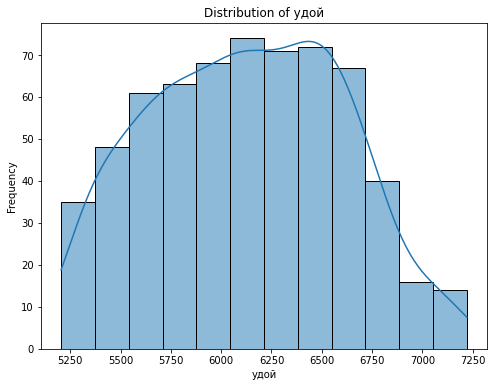

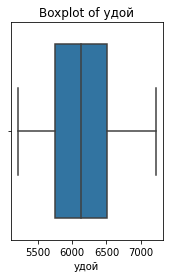

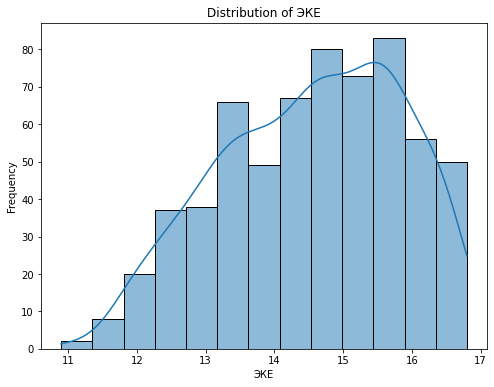

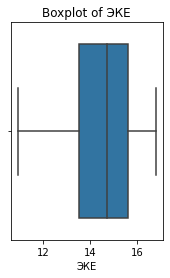

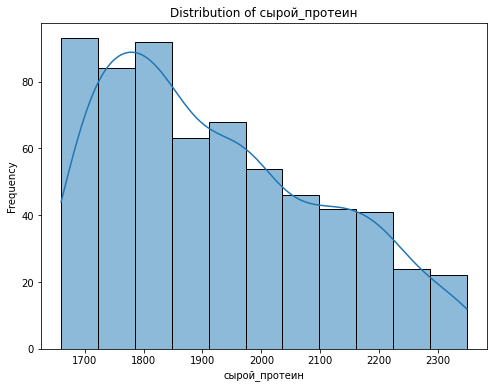

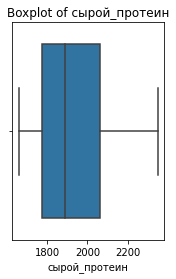

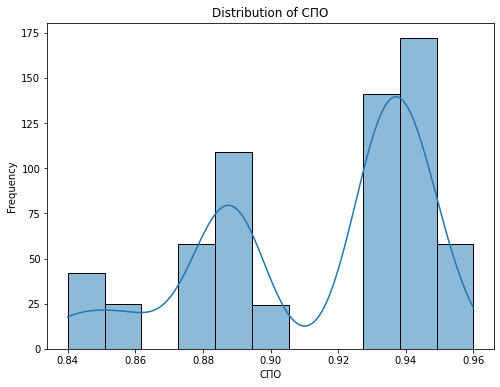

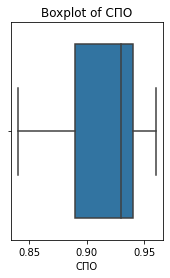

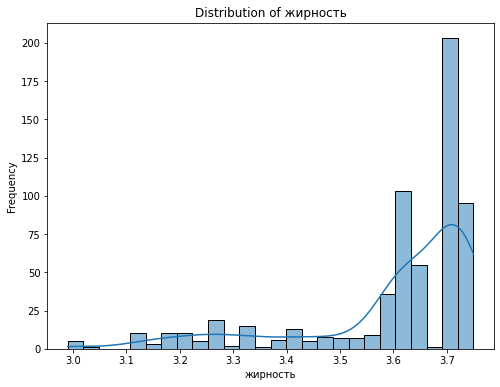

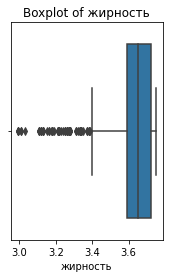

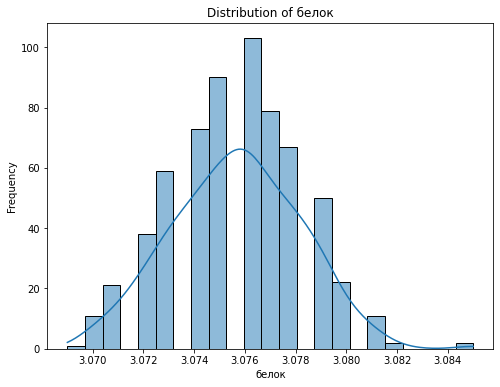

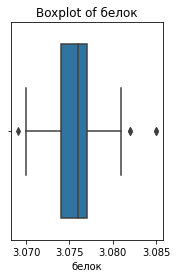

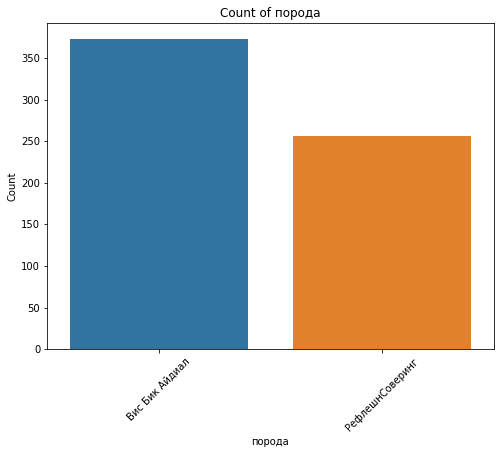

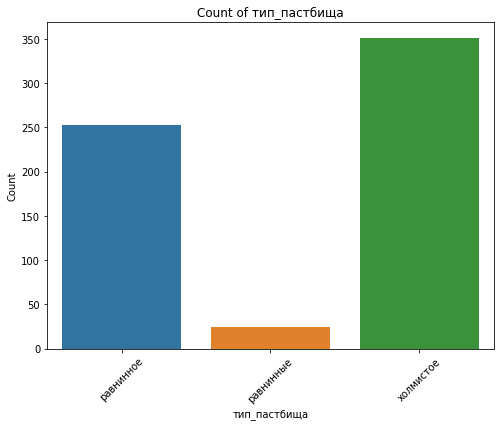

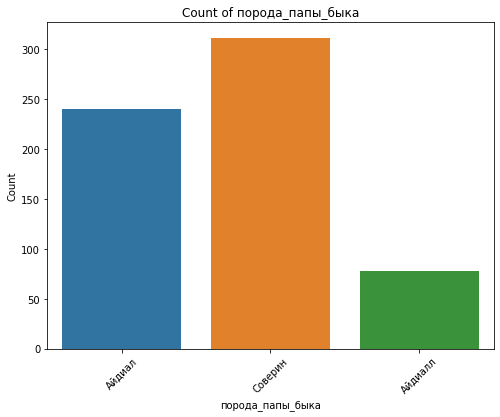

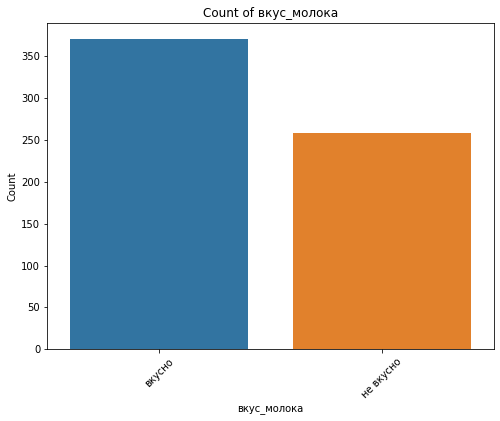

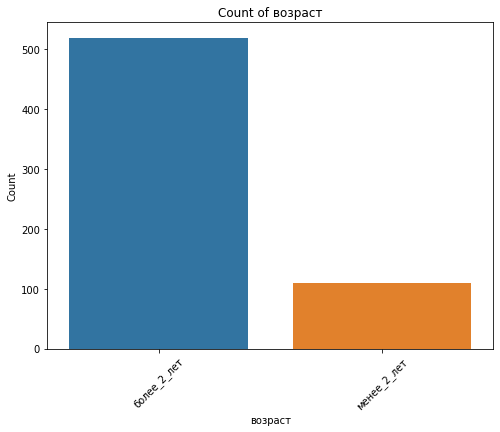

In [23]:
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(main[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=main[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    
    plt.show()


categorical_features = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=main)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Распределение признаков далеко от нормального :(

## Корреляционный анализ

В связи с ненормальным распределением данным, коэффициент корреляции будет не Пирсона, а Спирмана:

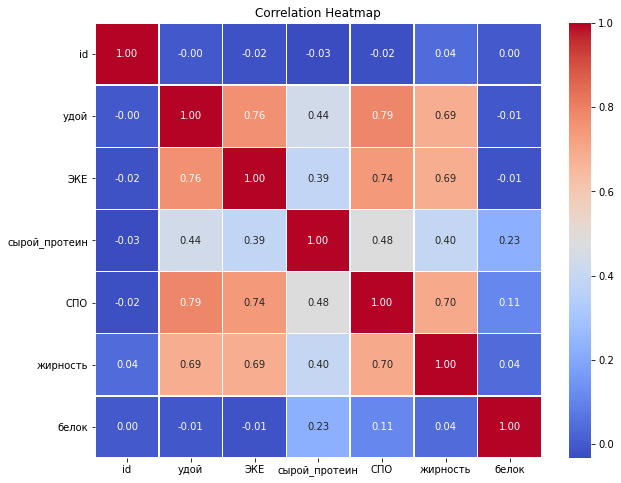

In [24]:
correlation_matrix = main.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

В полученной матрице корреляции Спирмана находятся коэффициенты, отражающие наличие средней и высоких положительных линейных взаимосвязей между переменными, однако мультиколлинеарности между признаками не наблюдается (нет коэффициентов, превышающих 0.9). Проанализируем также диаграммы рассеяния между целевым признаком - удоем - и другими количественными переменными по одной из категориальных значений - породе быка.

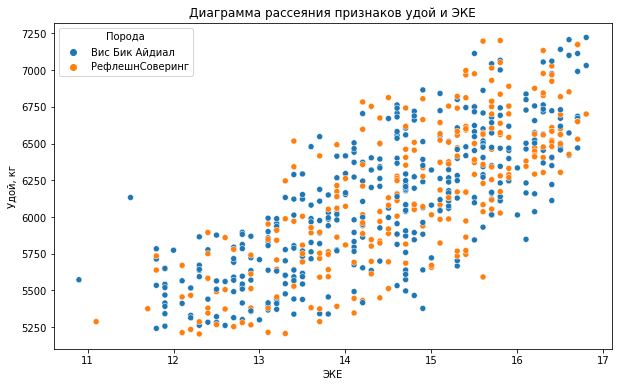

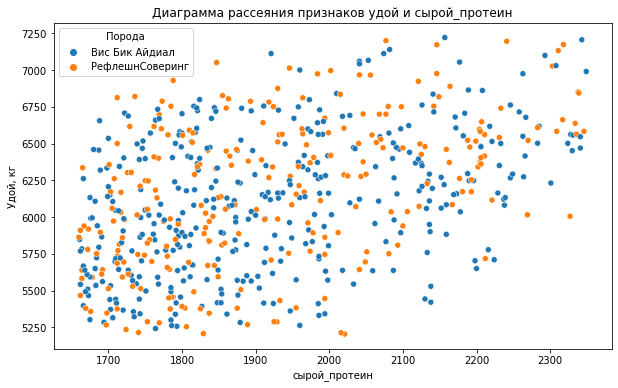

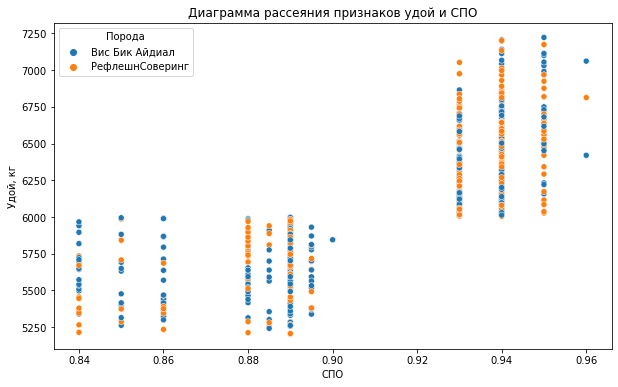

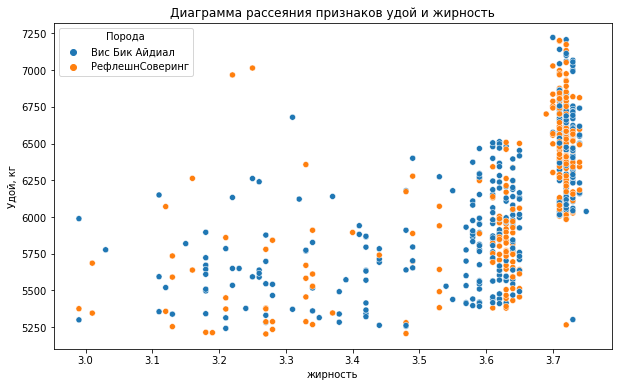

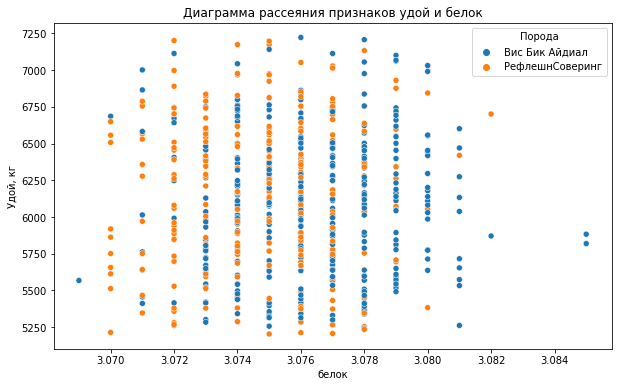

In [25]:
numeric_features = ['ЭКЕ', 'сырой_протеин', 'СПО', 'жирность', 'белок']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='удой', hue='порода', data=main)
    plt.title(f'Диаграмма рассеяния признаков удой и {feature}')
    plt.xlabel(feature)
    plt.ylabel('Удой, кг')
    plt.legend(title='Порода')
    plt.show()

Проанализируем полученные диаграммы рассеяния. При выявлении взаимосвязи между целевым признаком и таким показателем, как ЭКЕ, невозможно точно определить зависимость между значениями: она похожа на линейную с признаками квадратичной (или наоборот). Линейной зависимости между удоем и сырым протеином не обнаружено. Что касается взаимосвязи удоя с такими признаками, как СПО, жирность и белок, то стоит отметить, что данные распадаются на кластеры (3, 2 и 11 соответственно).

На мой взгляд, вводить дополнительные признаки необходимости нет.

## Обучение модели линейной регрессии

R² модели: 0.8176820336271738


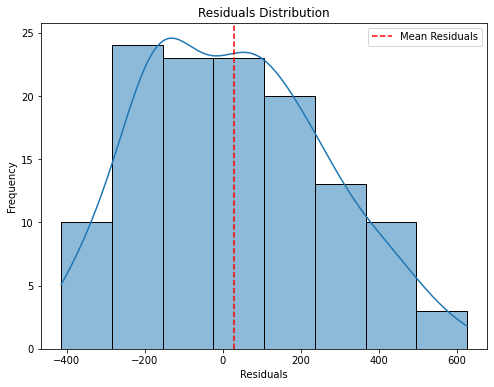

Mean Squared Error (MSE): 53420.37267557185
Mean Absolute Error (MAE): 191.37556296290617
Root Mean Squared Error (RMSE): 231.1284765570263


In [26]:
features = ['ЭКЕ', 'сырой_протеин', 'СПО', 
            'порода', 'порода_папы_быка', 'тип_пастбища', 'возраст']

X_train, X_test, y_train, y_test = train_test_split(main[features], main['удой'], 
                                                    test_size=0.2, random_state=42)

categorical_features = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст']
numeric_features = ['ЭКЕ', 'СПО', 'сырой_протеин']


preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² модели:", r2)



residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=residuals.mean(), color='r', linestyle='--', label='Mean Residuals')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Было необходимо спрогнозировать удой, следовательно, выбраны признаки, учитывая которые, можно логически и достаточно достоверно предсказать, какого значения достигнет этот показатель. R-squared модели равен 0.82, и это неплохой результат, однако распределение остатков несколько бимодально и не симметрично относительно нуля. Посчитаны значения трех видов ошибок. Дополнительные исследования проводить пока необходимости нет, попробуем обучить другие модели и сравнить результаты их работы друг с другом.

R² модели: 0.8434796275947047


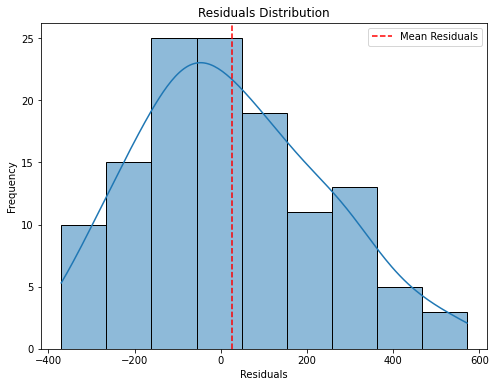

Mean Squared Error (MSE): 45861.50663896611
Mean Absolute Error (MAE): 173.28962412426122
Root Mean Squared Error (RMSE): 214.15299820214076


In [27]:
main['СПО_cat'] = main['СПО'].apply(lambda x: 1 if x > 0.92 else 0)
main['ЭКЕ_squared'] = main['ЭКЕ'] ** 2
# main.info()

features = ['ЭКЕ_squared', 'сырой_протеин', 'СПО_cat', 
            'порода', 'порода_папы_быка', 'тип_пастбища', 'возраст']

X_train, X_test, y_train, y_test = train_test_split(main[features], main['удой'], 
                                                    test_size=0.2, random_state=42)

categorical_features = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст']
numeric_features = ['ЭКЕ_squared', 'сырой_протеин', 'СПО_cat']


preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² модели:", r2)



residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=residuals.mean(), color='r', linestyle='--', label='Mean Residuals')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Было необходимо исключить нелинейность, поэтому показатель СПО был категоризирован путем разбиения на два кластера (см. диаграмму рассеяния в части корреляционного анализа) по значению границы между ними, а показатель ЭКЕ, в свою очередь, был возведен в квадрат. R-squared модели равен 0.84, и этот результат лучше, чем предыдущий, однако распределение остатков не симметрично относительно нуля. Посчитаны значения трех видов ошибок. Дополнительные исследования проводить пока необходимости нет, попробуем обучить другие модели и сравнить результаты их работы друг с другом.

In [28]:
merged = pd.merge(main, dads, on='id')
display(merged.head())

,id,удой,ЭКЕ,сырой_протеин,СПО,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,СПО_cat,ЭКЕ_squared,имя_папы
0,1,5863.0,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529.0,12.8,2138,0.890,Вис Бик Айдиал,равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810.0,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895.0,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302.0,12.8,1675,0.885,Вис Бик Айдиал,равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


Добавление с таблицу нового признако прошло успешно, продолжаем обучать модели!

R² модели: 0.855214896060549


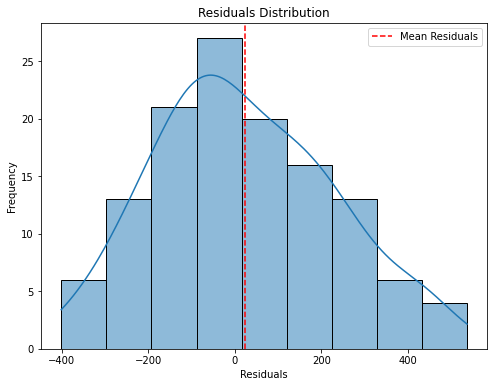

Mean Squared Error (MSE): 42422.99518907791
Mean Absolute Error (MAE): 167.11336460750604
Root Mean Squared Error (RMSE): 205.9684325062409


In [29]:
merged['СПО_cat'] = merged['СПО'].apply(lambda x: 1 if x > 0.92 else 0)
merged['ЭКЕ_squared'] = merged['ЭКЕ'] ** 2
# main.info()

features = ['ЭКЕ_squared', 'сырой_протеин', 'СПО_cat', 
            'порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'имя_папы']

X_train, X_test, y_train, y_test = train_test_split(merged[features], merged['удой'], 
                                                    test_size=0.2, random_state=42)

categorical_features = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'имя_папы']
numeric_features = ['ЭКЕ_squared', 'сырой_протеин', 'СПО_cat']


preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² модели:", r2)



residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.axvline(x=residuals.mean(), color='r', linestyle='--', label='Mean Residuals')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Был добавлен новый признак и устранена нелинейность. R-squared модели равен 0.86, и это ЛУЧШИЙ результат, однако рсапределение остатков несколько не симметрично относительно нуля... Посчитаны значения трех видов ошибок, свидетельствующие о том, что это действительно лучшая из всех получившихся модель!

In [30]:
from scipy import stats as st

print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(y_pred), scale=st.sem(y_pred)))

95% доверительный интервал = (6009.726305270995, 6172.143421000659)


/tmp/ipykernel_31/3328766500.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(y_pred), scale=st.sem(y_pred)))


95% значений, спрогнозированных моделью, лежат в интервале от 6010 литров удоя в год до 6172.

В таблицу, содержащую данные о коровах, рассматриваемых для покупки, добавлены необходимые столбцы. Время предсказывать!

In [31]:
# добавляем признаки
pur[['ЭКЕ', 'сырой_протеин','СПО']] = main[['ЭКЕ', 'сырой_протеин','СПО']]*1.05
# модифицируем
pur['СПО_cat'] = pur['СПО'].apply(lambda x: 1 if x > 0.966 else 0)
pur['ЭКЕ_squared'] = pur['ЭКЕ'] ** 2
# берем только нужные, чтобы таблица соответствовала той, на которой мы обучались
pur_1 = pur[features]
# подаем в пайплайн данные pur_1 и получаем предсказания удоя для каждой из коров
pipeline.predict(pur_1)
# добавляем предсказания в таблицу
pur['liters'] = pipeline.predict(pur_1)
display(pur.head(22))

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_белок,возраст,ЭКЕ,сырой_протеин,СПО,СПО_cat,ЭКЕ_squared,liters
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.910,1830.15,0.93450,0,222.308100,6091.015330
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.440,2244.90,0.93450,0,180.633600,5771.103328
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.700,1946.70,0.92925,0,216.090000,5836.652867
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,13.020,2112.60,0.92925,0,169.520400,5989.382812
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.440,1758.75,0.92925,0,180.633600,5906.433068
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,13.335,1896.30,0.92925,0,177.822225,5734.950215
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,13.860,1881.60,0.92925,0,192.099600,5988.055383
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,1896.30,0.97650,1,238.239225,6499.120233
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.910,2013.90,0.98700,1,222.308100,6253.952786
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.070,1880.55,0.93975,0,197.964900,5831.330667


## Обучение модели логистической регрессии

In [32]:
main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [33]:
merged['СПО_cat'] = merged['СПО'].apply(lambda x: 1 if x > 0.91 else 0)
merged['ЭКЕ_squared'] = merged['ЭКЕ'] ** 2
merged['вкус'] = merged['вкус_молока'].map({'вкусно': 1, 'не вкусно': 0})

In [34]:
features = ['ЭКЕ_squared', 'сырой_протеин', 'жирность', 'белок',
            'СПО_cat', 'порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'имя_папы']


X_train, X_test, y_train, y_test = train_test_split(merged[features], merged['вкус'], 
                                                    test_size=0.2, random_state=42)

categorical_features = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст', 'имя_папы', 'СПО_cat']
numeric_features = ['ЭКЕ_squared', 'сырой_протеин', 'жирность', 'белок']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6190476190476191
Recall: 0.7283950617283951
Precision: 0.6941176470588235
Confusion Matrix:
[[19 26]
 [22 59]]


При покупке коров критичнее всего ошибка первого рода - ложноположительная, то есть когда невкусное молоко по предсказанию оказывается вкусным. Таким образом, нам важнен такой показатель, как precision, потому что он, в отличие от recall, чувствителен к обозначению невкусного молока как вкусного.

Посмотрим, как меняется значение precision в зависимости от разных порогов принадлежности к классам:

In [36]:
probabilities_valid = pipeline.predict_proba(X_test)[:,1]

for i in np.arange(0.5, 0.9, 0.02).round(2):
    y_pred = probabilities_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))

порог:  0.5 precision:  0.6941176470588235
порог:  0.52 precision:  0.7283950617283951
порог:  0.54 precision:  0.7323943661971831
порог:  0.56 precision:  0.7285714285714285
порог:  0.58 precision:  0.75
порог:  0.6 precision:  0.7678571428571429
порог:  0.62 precision:  0.7843137254901961
порог:  0.64 precision:  0.8085106382978723
порог:  0.66 precision:  0.8461538461538461
порог:  0.68 precision:  0.8333333333333334
порог:  0.7 precision:  0.8333333333333334
порог:  0.72 precision:  0.8260869565217391
порог:  0.74 precision:  0.8095238095238095
порог:  0.76 precision:  0.8235294117647058
порог:  0.78 precision:  0.7857142857142857
порог:  0.8 precision:  0.9090909090909091
порог:  0.82 precision:  1.0
порог:  0.84 precision:  1.0
порог:  0.86 precision:  1.0
порог:  0.88 precision:  1.0


Как видно из результатов, начиная с порога в 0.8, модель в более, чем 91 случае из 100 обозначает вкусное молоко вкусным. Применим этот порог и предскажем вкус молока коров, которые рассматриваются для покупки.

In [37]:
new_threshold = 0.80
y_pred_new_threshold = (probabilities_valid > new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
recall_new_threshold = recall_score(y_test, y_pred_new_threshold)
precision_new_threshold = precision_score(y_test, y_pred_new_threshold)
conf_matrix_new_threshold = confusion_matrix(y_test, y_pred_new_threshold)

print("Accuracy:", accuracy_new_threshold)
print("Recall:", recall_new_threshold)
print("Precision:", precision_new_threshold)
print("Confusion Matrix:")
print(conf_matrix_new_threshold)

Accuracy: 0.42857142857142855
Recall: 0.12345679012345678
Precision: 0.9090909090909091
Confusion Matrix:
[[44  1]
 [71 10]]


In [38]:
pur = pur.rename(columns={'текущая_жирность': 'жирность', 'текущий_белок': 'белок',})
pur

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,ЭКЕ,сырой_протеин,СПО,СПО_cat,ЭКЕ_squared,liters
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.910,1830.15,0.93450,0,222.308100,6091.015330
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.440,2244.90,0.93450,0,180.633600,5771.103328
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.700,1946.70,0.92925,0,216.090000,5836.652867
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,13.020,2112.60,0.92925,0,169.520400,5989.382812
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.440,1758.75,0.92925,0,180.633600,5906.433068
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,13.335,1896.30,0.92925,0,177.822225,5734.950215
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,13.860,1881.60,0.92925,0,192.099600,5988.055383
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,1896.30,0.97650,1,238.239225,6499.120233
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.910,2013.90,0.98700,1,222.308100,6253.952786
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.070,1880.55,0.93975,0,197.964900,5831.330667


In [39]:
pur_2 = pur[features]
pipeline.predict(pur_2)

pur['taste'] = pipeline.predict_proba(pur_2)[:, 1]
display(pur)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,ЭКЕ,сырой_протеин,СПО,СПО_cat,ЭКЕ_squared,liters,taste
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.910,1830.15,0.93450,0,222.308100,6091.015330,0.779686
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.440,2244.90,0.93450,0,180.633600,5771.103328,0.700544
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.700,1946.70,0.92925,0,216.090000,5836.652867,0.597729
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,13.020,2112.60,0.92925,0,169.520400,5989.382812,0.374297
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.440,1758.75,0.92925,0,180.633600,5906.433068,0.339825
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,13.335,1896.30,0.92925,0,177.822225,5734.950215,0.136285
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,13.860,1881.60,0.92925,0,192.099600,5988.055383,0.705984
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.435,1896.30,0.97650,1,238.239225,6499.120233,0.666448
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.910,2013.90,0.98700,1,222.308100,6253.952786,0.475784
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,14.070,1880.55,0.93975,0,197.964900,5831.330667,0.642750


In [41]:
cows_needed = (pur['liters'] > 6000) & (pur['taste'] > 0.8)
cows_needed

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

Получается, что есть всего одна корова, которая бы приносила в год больше 6000 литров вкусного молока((

## Итоговые выводы

Единственное, что важно по итогу всего анализа и предсказаний удоя и вкуса молока коров, - это то, что есть всего одна буренка, отвечающая требованиям фермера.

Мне кажется, не стоит так сильно придираться к количеству молока, которое корова может дать за год, а вот вкус молока критичен. Учитывая методы классификации вкуса молока, оно должно быть не просто вкусным, а очень вкусным - а товары категории "очень" можно продавать дороже. При правильно назначенной цене чистая выручка от продажи ОЧЕНЬ вкусного молока может оказаться больше, чем такой же показатель от продажи просто вкусного молока, но в большем объеме.

В этом проекте для улучшения качества регрессионной модели были использованы следующие методы:
   
    - категоризация данных (например, с помощью разбиения на кластеры);
    - возведение значений в квадрат для устранения нелинейной связи между целевым и рассматриваемым признаками;
    - добавление новых признаков (были объединены две таблицы);
    - кодирование категориальных переменных с помощью One-Hot Encoding;
    - масштабирование числовых признаков с помощью StandardScaler.

На мой взгляд, улучшить качество регрессионной модели можно: например, поднять порог предсказаний вкуса. Однако для имеющихся даннх модель ОЧЕНЬ хороша.

По моему мнению, для анализа рисков и/или экономических расчетов важны следующие метрики:
    
    1. MAE и MSE, которые в контексте экономических расчетов помогают оценить, насколько точно модель предсказывает целевую переменную, что может быть критично для принятия решений о финансовых стратегиях или инвестициях;

    2. RMSE, которая в контексте рисков помогает определить, насколько точными будут прогнозы модели, что важно для управления финансовыми рисками и определения стратегий управления рисками;

    3. R-squared, который в экономических расчетах помогает определить, насколько хорошо модель соответствует данным, и может быть использован для оценки качества прогнозирования экономических показателей;
    
    4. Precision, Recall и Confusion Matrix, которые играют важную роль в оценке производительности моделей классификации, особенно при прогнозировании финансовых рисков или принятии решений о кредитовании.